## FINAL PROJECT SUBMISSION

Please fill out:
* Student name: MERCY KIRAGU
* Student pace: FULLTIME-HYBRID
* Scheduled project review date/time:07/06/2024
* Instructor name: MARYANN MWIKALI
* Blog post URL:N/A


## CREDIT CARD FRAUD DETECTION SYSTEM FOR ZEST BANK

### 1. BUSINESS UNDERSTANDING

### a.)OVERVIEW

Zest Bank, like many financial institutions, faces the constant threat of fraudulent activities. These credit card fraudulent activities can result in significant financial losses and damage to the bank's reputation. To mitigate these risks, Zest Bank is seeking to implement a robust fraud detection system that can accurately identify and prevent fraudulent transactions in real-time.

### b.) PROBLEM STATEMENT
For many banks,retainng high profitable customers is the number one goal.Banking fraud,however poses a significant threat to this goal for differrent banks including Zest Bank .In terms of substantial financial losses ,trust and credibility ,this is a concerning issue to both Zest Bank and it's customers.

Zest Bank faces a significant challenge in detecting and preventing fraudulent transactions within its extensive financial network. Conventional rule-based systems have proven insufficient against increasingly sophisticated fraud schemes, resulting in substantial financial losses and reputational harm. Therefore, there is an urgent need to develop and deploy an advanced fraud detection system capable of accurately identifying fraudulent activities in real-time, while minimizing false positives.

In this project I will create a system called SafeSwipe for detecting fraudulent credit card transactions with the help of classification machine learning models.




### c.) CHALLENGES

1. **Data Volume**: Handling the vast amount of data processed daily requires a model that responds quickly to detect fraud.

2. **Imbalanced Data**: With the majority of transactions being non-fraudulent, detecting the fraudulent ones becomes challenging.

3. **Data Privacy**: Accessing data, especially private information, poses a significant challenge.

4. **Misclassification**: Some fraudulent transactions go unnoticed, leading to misclassification.

5. **Adaptive Techniques by Scammers**: Scammers continually evolve their methods, posing a challenge to the effectiveness of fraud detection models. 
6. **Accuracy Metrics** :Accuracy alone may not be the most appropriate metric to evaluate the performance of the fraud detection model.






### d.) PROPOSED SOLUTIONS

**Solutions:**

1. **Simple and Fast Models**: Implementing models that are both simple and quick to identify anomalies and classify them as fraudulent transactions promptly.

2. **Imbalance Handling Methods**: Utilizing effective methods to address imbalance in the data,such as oversampling and undersampling methods ensuring accurate detection of fraudulent 
transactions.

3. **Privacy-preserving Techniques**: Reducing data dimensionality to protect user privacy while maintaining the model's effectiveness.

4. **Trustworthy Data Sources**: Using reliable data sources that verify and double-check the information, particularly during model training, to enhance accuracy.

5. **Interpretable Models**: Developing models that are simple and interpretable allows for swift adaptation to new scamming techniques with minimal adjustments, ensuring continuous deployment of effective fraud detection systems.

6. **use other metrics** :to use metrics such as precision, recall, and F1-score, along with accuracy, to evaluate the performance of a fraud detection model

### e.) OBJECTIVES

1. **Developing an Efficient Model**: Create various classification machine learning models and settling on the best performing model capable of accurately identifying fraudulent credit card transactions while minimizing false positives.

2. **Handling Imbalanced Data**: Implement techniques to address the class imbalance in the dataset, ensuring that the model can effectively learn from the limited number of fraudulent transactions.

3. **Real-time Detection**: Build a system that can process transactions in real-time, providing immediate alerts for potentially fraudulent activity to prevent financial losses.

4. **Privacy Preservation**: Incorporate privacy-preserving techniques to protect sensitive customer information while still allowing for effective fraud detection.

5. **Performance Evaluation**: Conduct thorough evaluation and validation of the model's performance using appropriate metrics, such as precision, recall, F1-score, to assess its effectiveness in real-world scenarios.


6. **Scalability**: Design the system to handle large volumes of transactions efficiently, ensuring scalability to accommodate growth in transaction volume over time.

7. **Normalization**: Apply normalization techniques to preprocess the data and standardize features, ensuring that the model's performance is not affected by variations in the scale of input features.

8. **Hyperparameter Tuning**: Explore and optimize the hyperparameters of the machine learning model to enhance its performance further. Utilize techniques such as grid search, random search to systematically search the hyperparameter space and identify the configuration that maximizes the model's effectiveness in fraud detection while minimizing computational resources and training time. Conduct cross-validation to validate the chosen hyperparameters and ensure robustness of the model across different subsets of the data.


## 2.) DATA UNDERSTANDING
### a.)DATA SOURCE
The dataset for this project was sourced from Kaggle, a platform for data science datasets.Specifically, the dataset  I used is the credit card fraud detection dataset.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.The dataset consists of 31 columns/features and 284,807 rows

It contains only numerical input variables which are the result of a PCA transformation.Due to confidentiality issues original features and more background information about the data wasn't provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which were not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### IMPORTING THE NECESSARY LIBRARIES

In [132]:

# importing the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier











import warnings

### LOADING THE DATA

In [73]:
#loading the data
df = pd.read_csv('creditcard.csv')


In [74]:
#code for displaying all the columns
pd.options.display.max_columns = None

In [75]:
#CHECKING THE FIRST FIVE ROWS
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
#CHECKING THE LAST FIVE ROWS
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 3.)EXPLORATORY DATA ANALYSIS

In [77]:
#CHECKING THE ROWS AND COLUMNS
df.shape

(284807, 31)

In [78]:
#CHECKING ALL THE COLUMN NAMES
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [79]:
#CHECKING THE STATSTICAL SUMMARY OF THE FEATURES
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [81]:
#CHECKING THE DATATYPES AND NON/NULL DISTRIBUTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### **Handling missing values**

In [82]:
#CHECKING IF THERE ARE ANY MISSING VALUES
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### **observation**

There are no features with missing values.

##### **Dealing with duplicates.**

In [83]:
df.duplicated().any()

True

In [104]:
df.duplicated().sum()

8063

##### **Observation**

There are 1081 rows with  duplicate values which we are going to drop.

In [85]:
#DROP THE DUPLICATED ROWS
# Identify duplicated rows
duplicated_rows = df.duplicated()

# Invert the boolean mask to keep non-duplicated rows
df = df[~duplicated_rows]

In [86]:
df.duplicated().any()

False

Our dataset now has no duplicates.

##### **Dealing with Outliers.**

As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence not performing any outliers treatment on the dataframe.

##### **Observing the distribution of our classes**

In [87]:
#CHECKING THE CLASS DISTRIBUTION OF THE TARGET VARIABLE
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [88]:
# CREATING NEW VARIABLES 'no_fraud' and 'fraud'
no_fraud = df['Class'] == 0
fraud = df['Class'] == 1


In [89]:
#CHECKING THE CLASS DISTRIBUTION OF THE TARGET VARIABLE IN PERCENTAGE
print('No Frauds', round(df['Class'].value_counts()[0] / len(df) *100,2), '%of the dataset')
print('Frauds', round(df['Class'].value_counts()[1] / len(df) *100,2), '%of the dataset')



No Frauds 99.83 %of the dataset
Frauds 0.17 %of the dataset


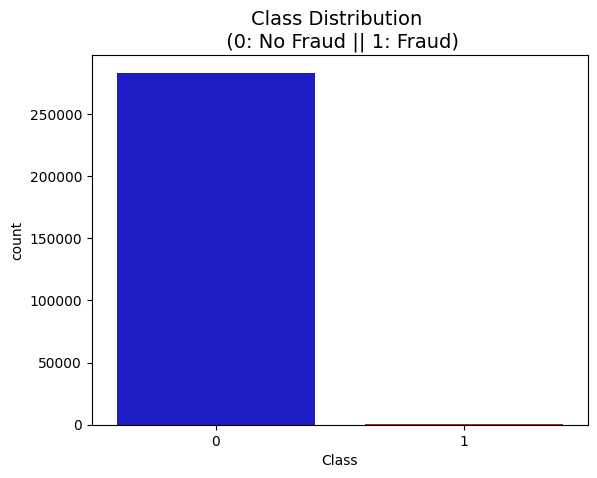

In [90]:
#CREATING A BAR CHART FOR THE CLASS DISTRIBUTION OF FRAUDULENT VS NON FRAUDULENT TRANSACTIONS

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


**Observation.**

The dataset exhibits a significant class imbalance, with non-fraudulent transactions representing approximately 99.83% of the data and fraudulent transactions accounting for the remaining 0.17%. This imbalance can pose challenges in training accurate machine learning models, as algorithms may tend to favor the majority class and perform poorly on the minority class.

 **observing the distribution of classes with Amount.**

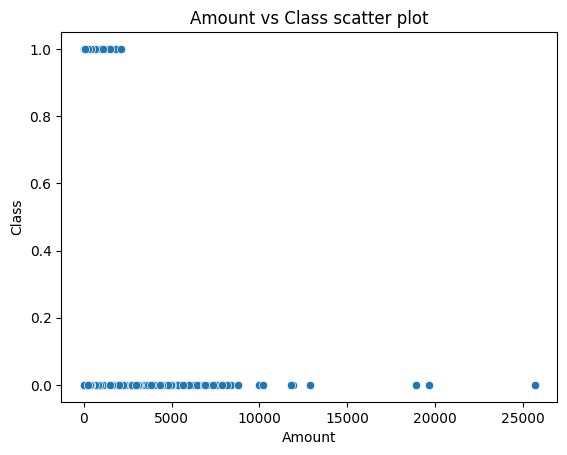

In [105]:
# Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df["Amount"], y=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

**Observing the distribution of classes with time.**

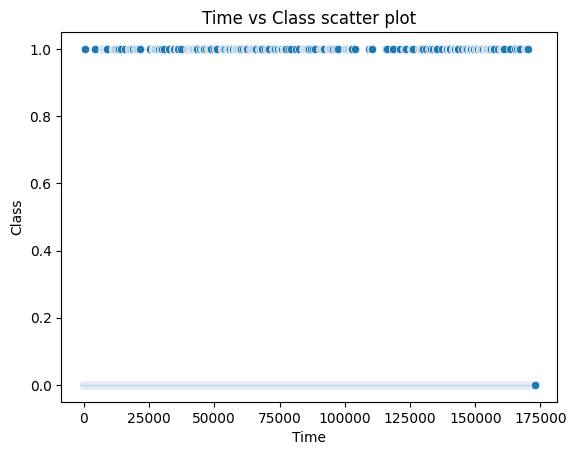

In [92]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x= df["Time"],y=df["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

##### **Observation**

There is not much insight can be drwan from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

Dropping Time column as this feature is not going to help in the model building.


In [93]:

# Drop unnecessary columns
df = df.drop("Time", axis = 1)

**Checking the distribution of the numerical features**

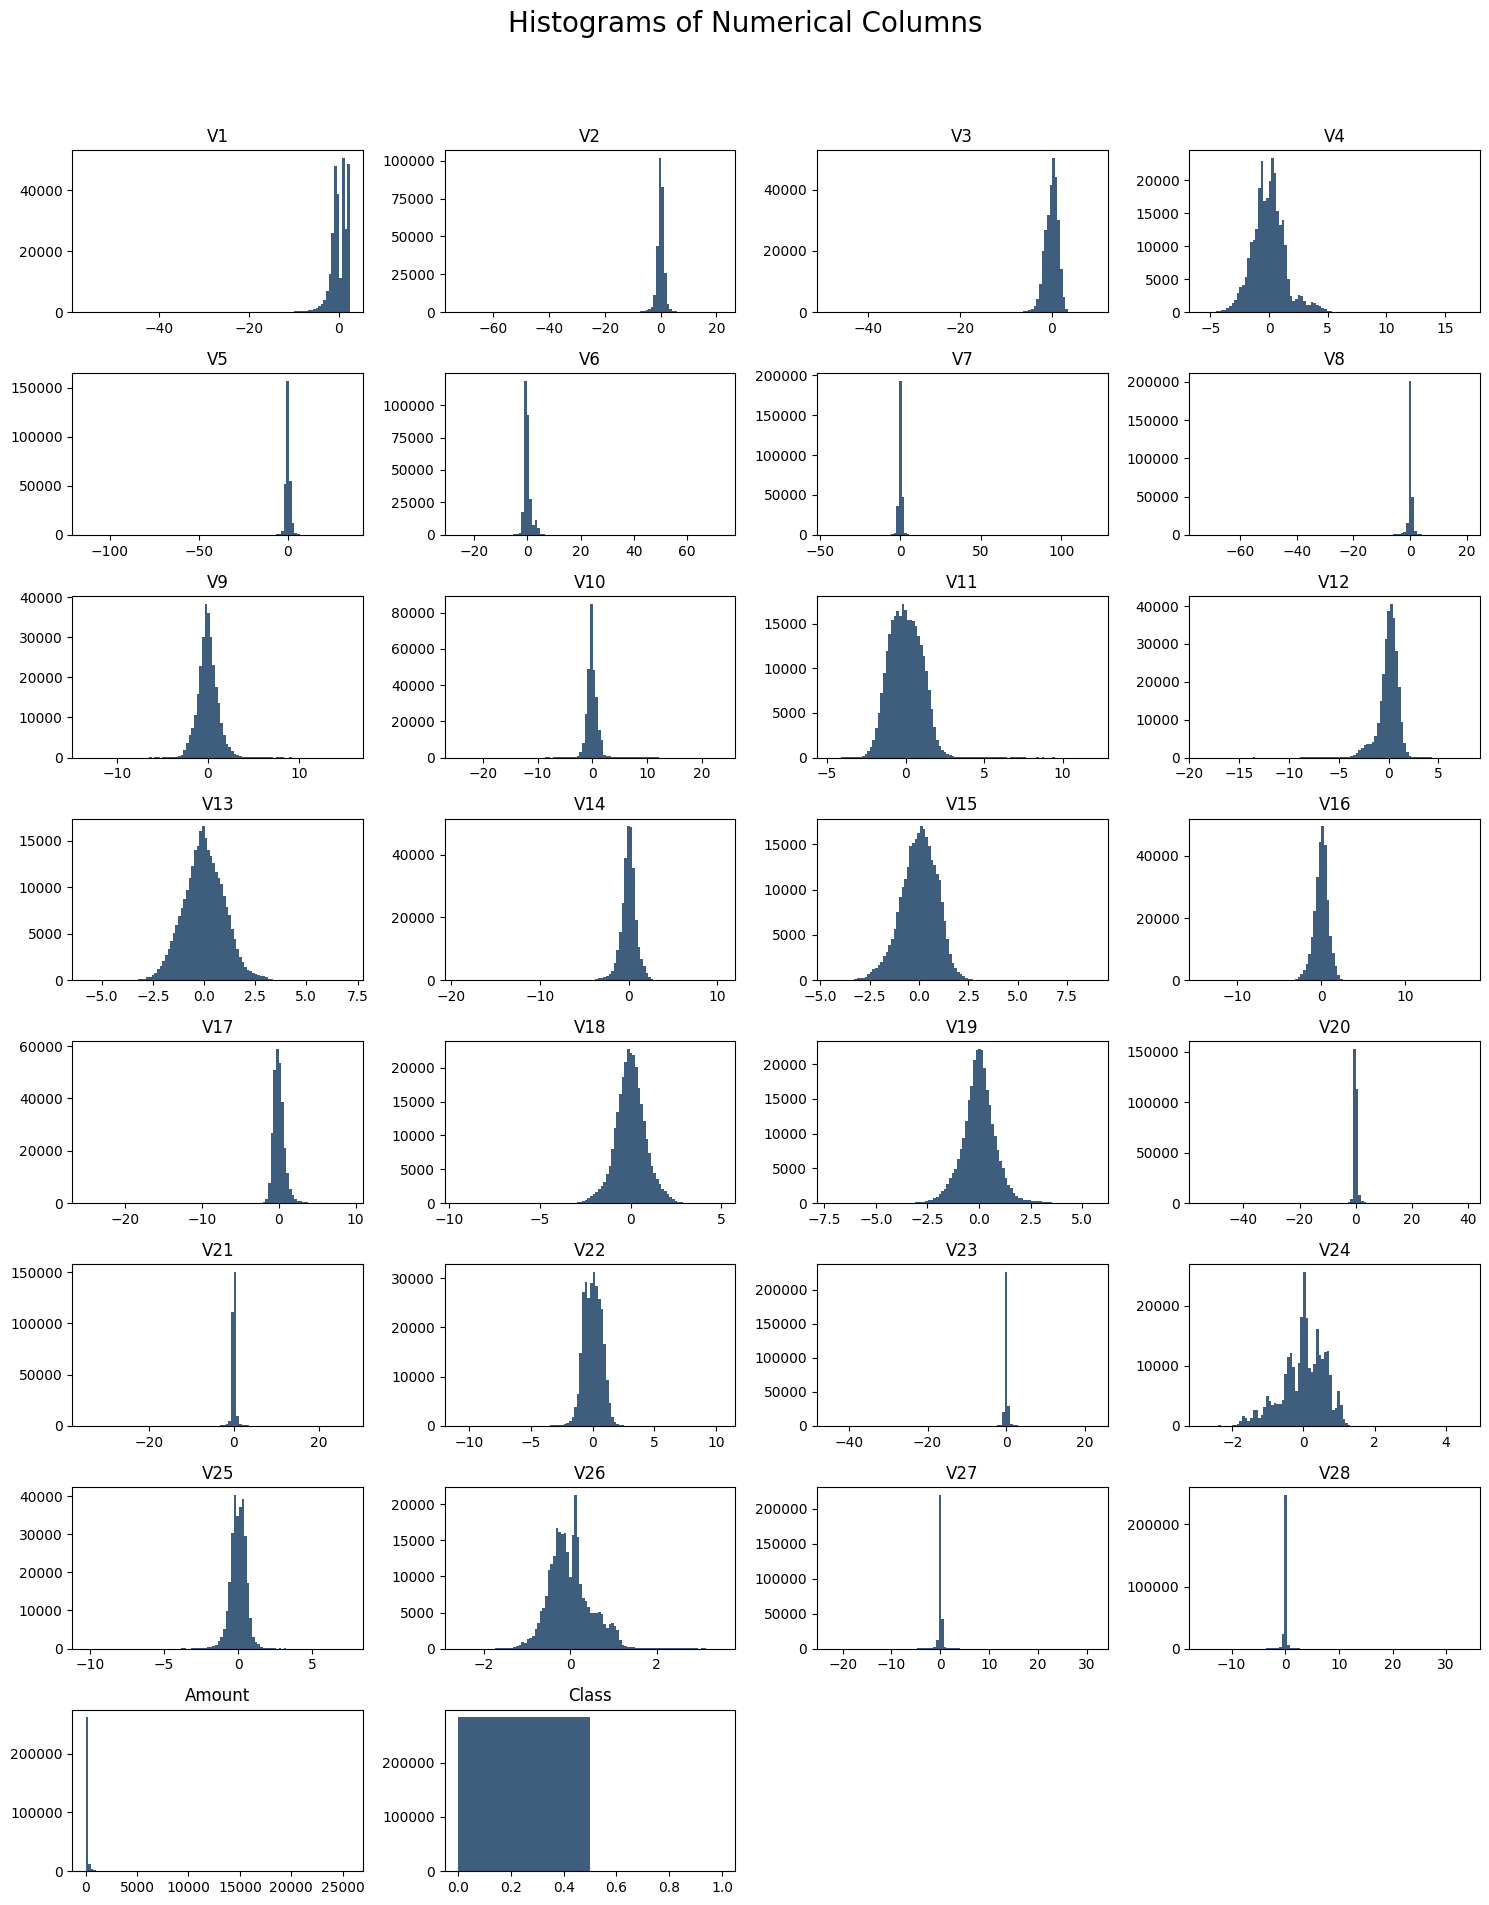

In [94]:
## Histograms to show the distribution of the numerical features.
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Correlation check**

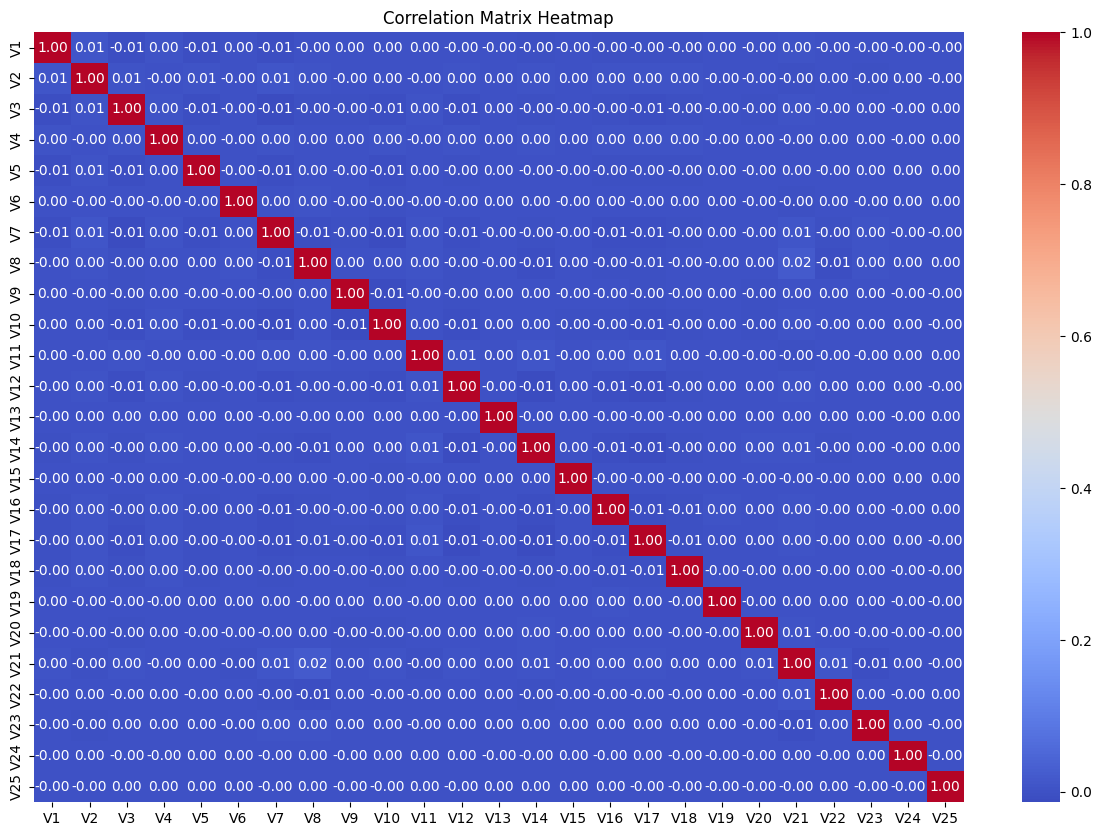

In [95]:
# VISUALIZING CORRELATION OF THE FEATURES
columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", 
           "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", 
           "V20", "V21", "V22", "V23", "V24", "V25"]

# Calculate the correlation matrix for the specified columns
cor_mat = df[columns].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Obseravation**

Clearly there is little to no correlation between the features.

<Figure size 640x480 with 0 Axes>

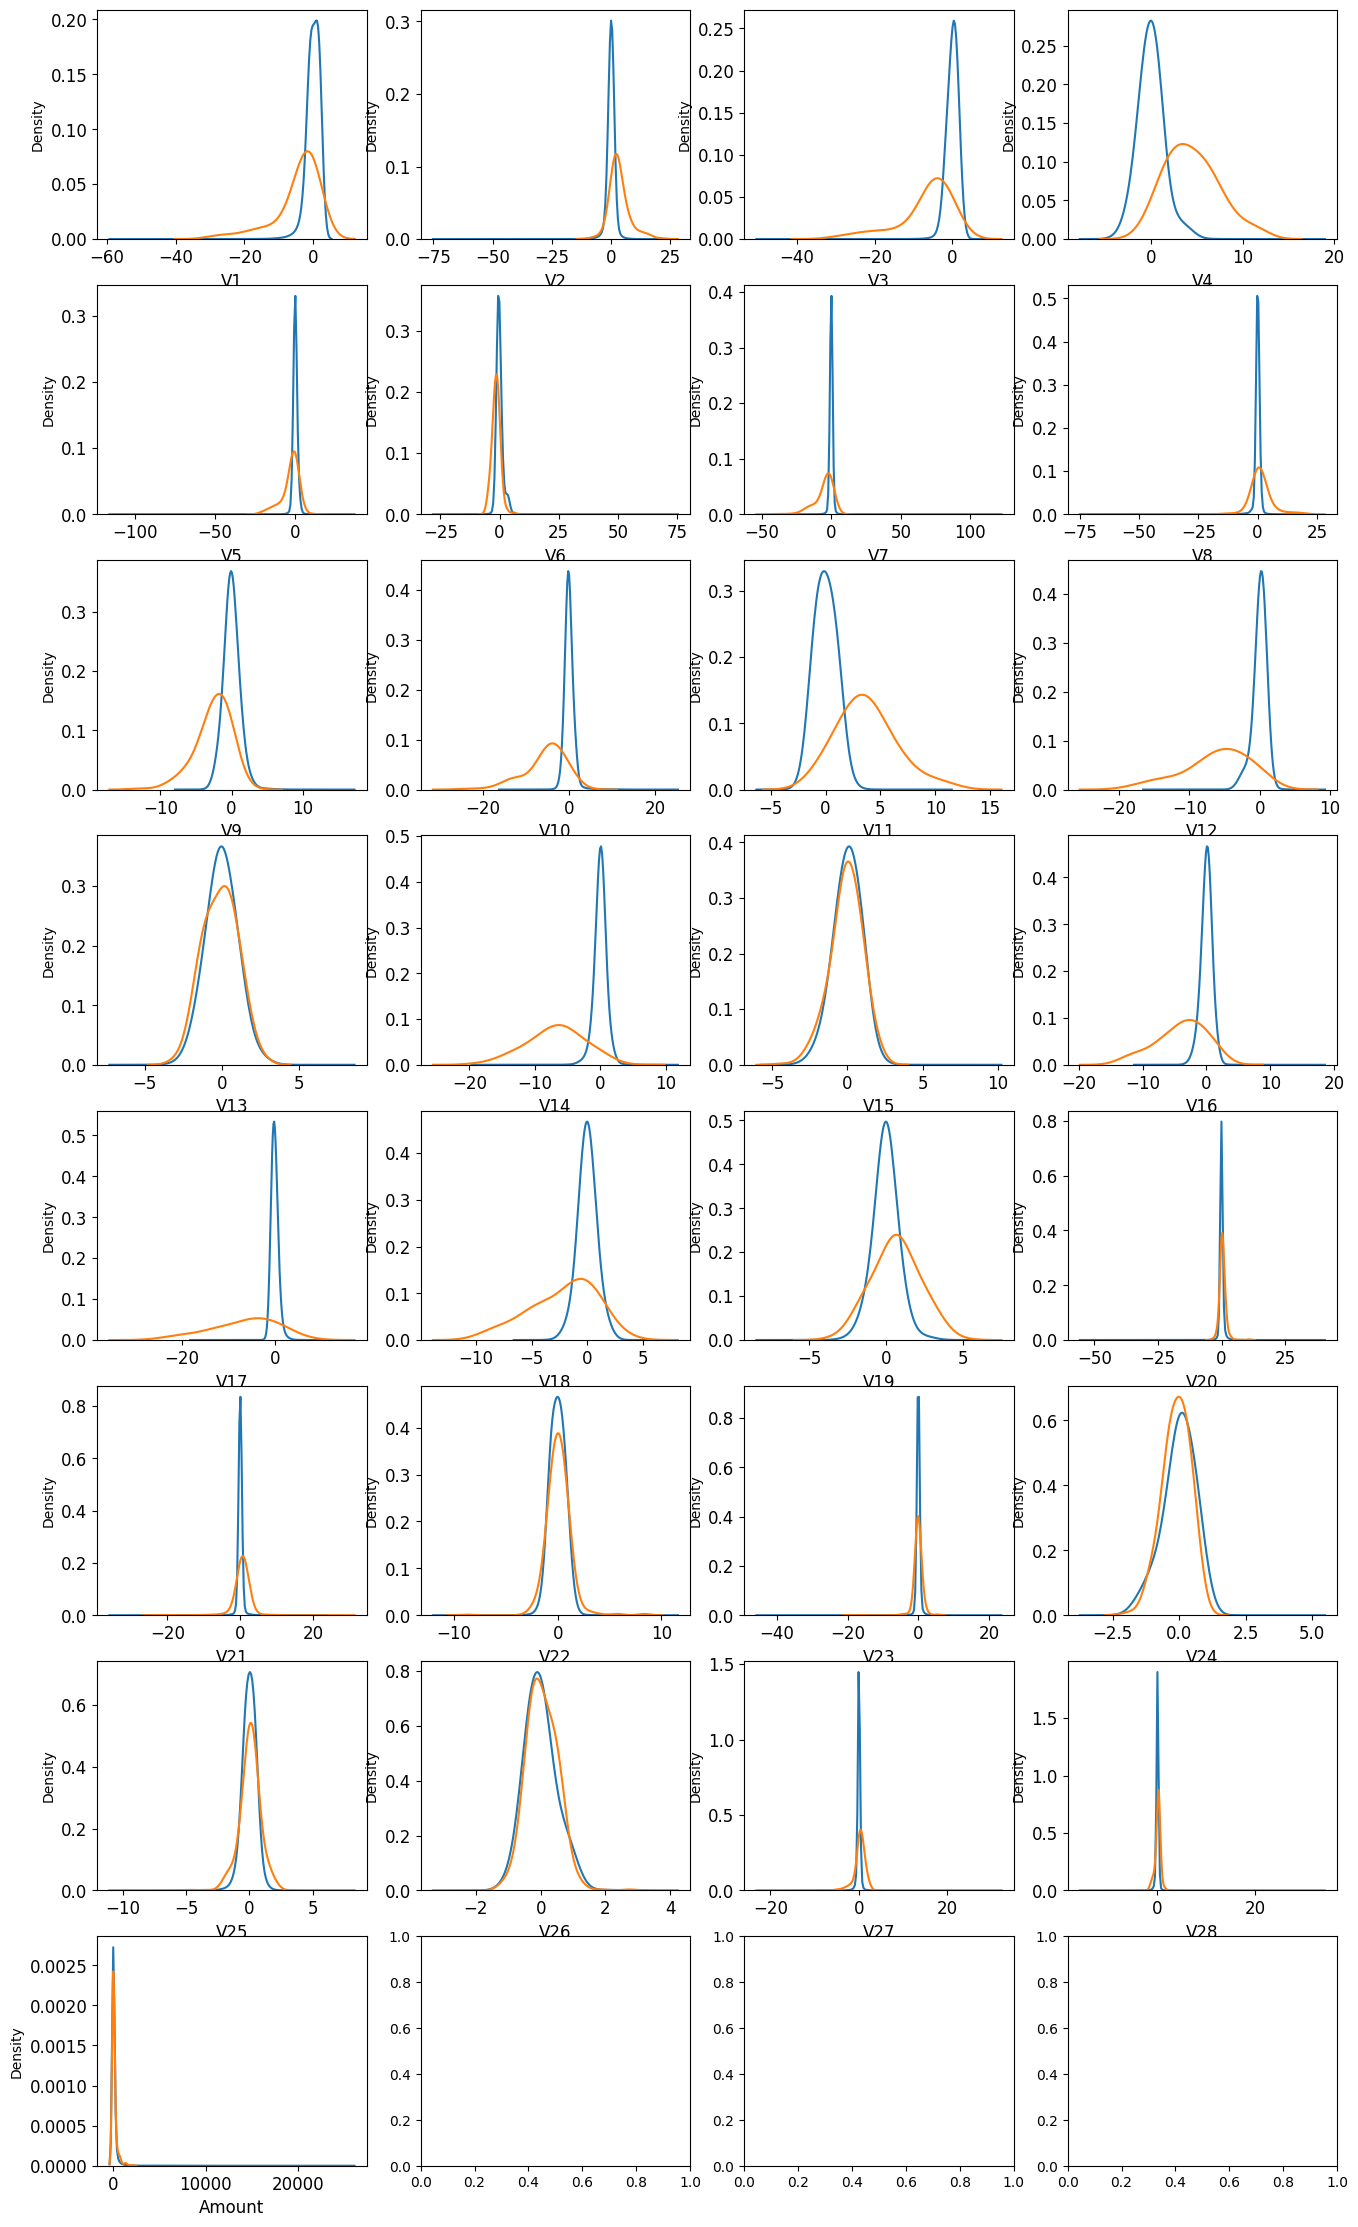

In [96]:
# Plotting all the variable in displot to visualise the distribution 
#Suppress FutureWarning
warnings.simplefilter(action='ignore', category=UserWarning)

var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")


i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)



We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.


#### STORE  INDEPENDENT FEATURES IN X AND TARGET (RESPONSE) IN Y

In [97]:
#SPLITTING THE DATASET INTO X AND Y
X = df.drop('Class',axis=1)
y = df['Class']

In [98]:
#CHECKING SOME ROWS OF X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [99]:
#CHECKING SOME ROWS OF Y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [100]:
cols = list(X.columns.values)

### SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [102]:
#SPLITTING THE DATASET USING TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

by splitting the dataset I'm preserving X_test and Y_test to evaluate once I'm done modelling.

In [107]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

473
383
90


##### **NORMALIZATION**

We need to scale Amount column.

In [108]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
#Instantiating the scaler
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [110]:
#checking if the amount column has been scaled
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,-1.488768,1.579133,1.209313,-0.429979,-0.610963,-1.131418,-0.647136,0.350953,-2.064159,-2.368923,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,0.909212
265736,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,-0.419227,-0.438801,-0.143149,-0.658636,0.377831,-0.864628,-0.595559,-0.687246,-0.630884,-1.018978,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,-0.218631
42801,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,-0.668365,-0.840314,0.093767,-0.238536,-0.191213,-0.337460,-0.281847,0.023268,-0.528238,0.384716,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.271442
172689,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,-0.167418,0.974559,0.457359,-0.604572,0.718360,-0.478633,-0.746844,-0.689893,0.173677,0.218804,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,-0.325679
179949,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,-0.657858,-1.070360,0.801458,0.902157,-0.338631,0.081557,0.231948,-0.714601,0.152661,-0.647147,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.311060


##### **Handling Skewness**

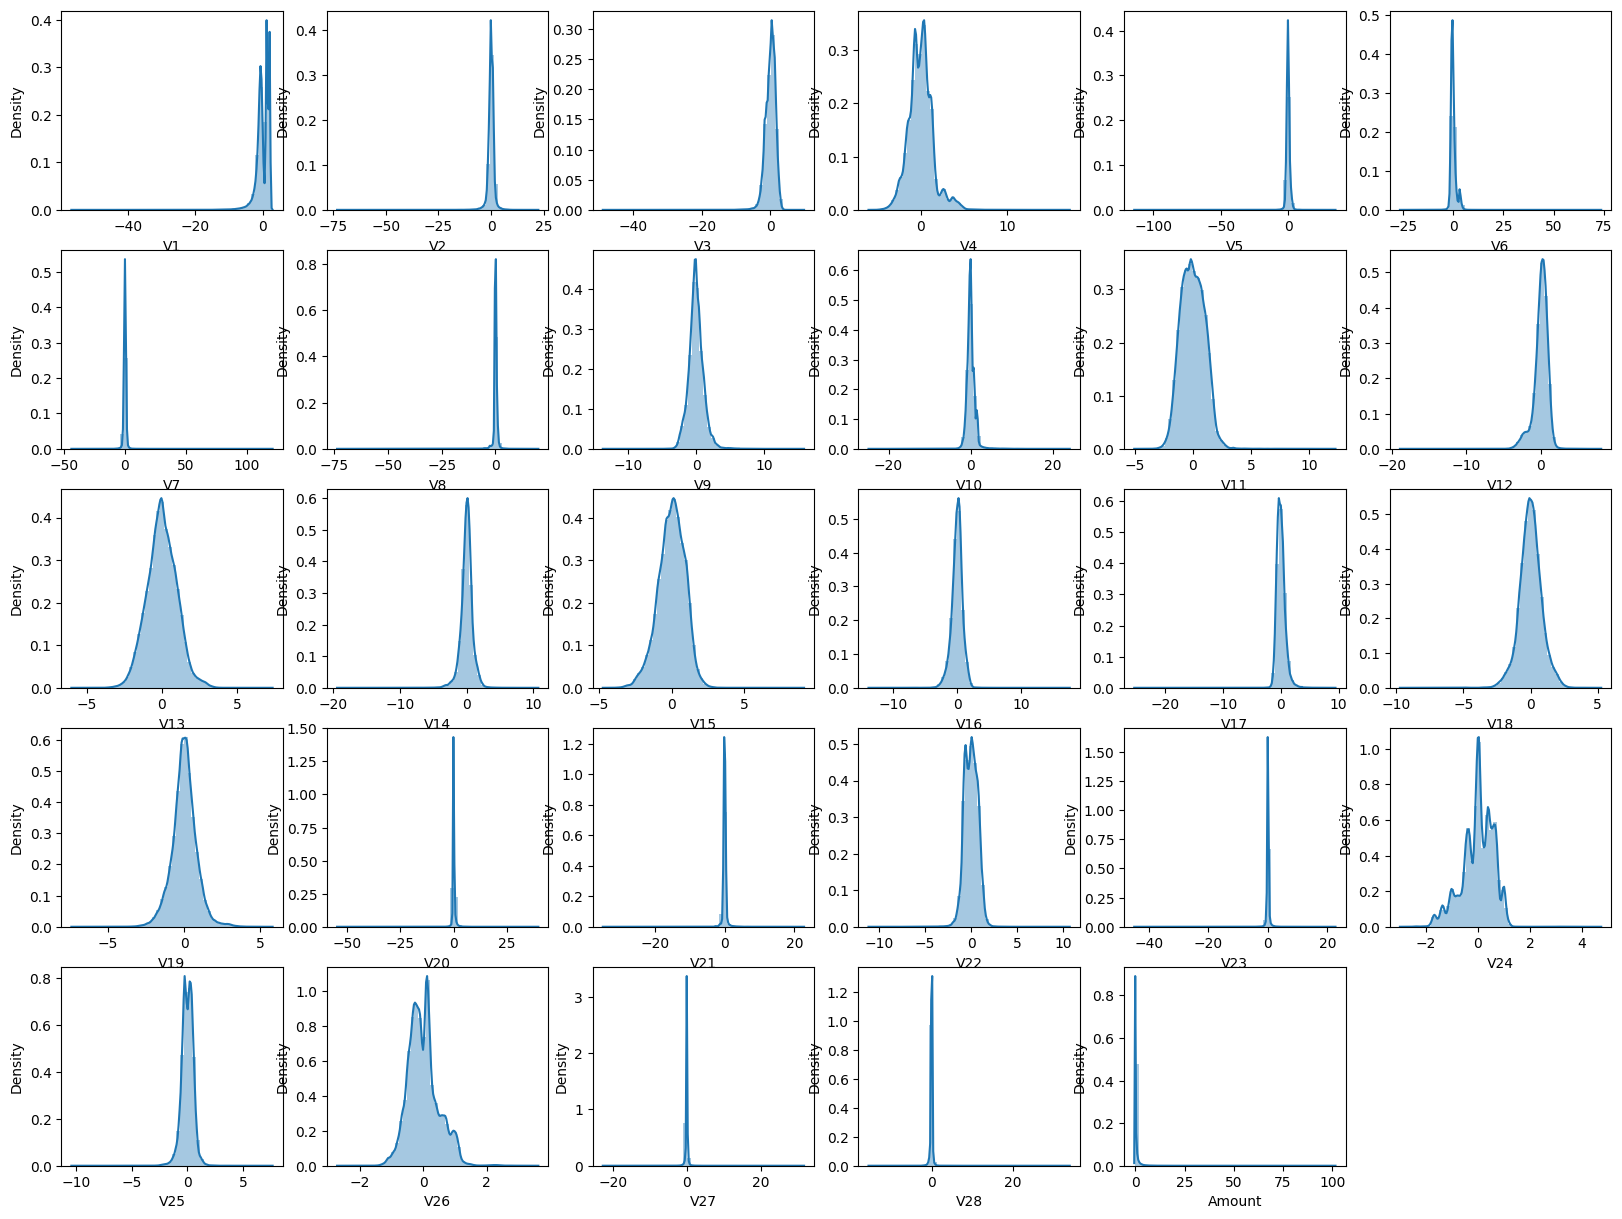

In [111]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()


**Observation**

Lot of features are highly skewed. So I will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [112]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.303525,-4.772388,-2.256569,0.68212,-2.933103,1.961982,3.553954,-8.295268,0.517505,1.112861,0.339385,-2.219895,0.066952,-1.941116,-0.307116,-1.060879,-3.827747,-0.26564,0.106848,-2.250287,2.682086,-0.180813,-6.268434,-0.550516,-0.425273,0.5871,-0.453339,12.793148,18.040378


In [113]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


There is skewness present in the distribution of the above features:
 I will use Power Transformer package present in sklearn  to make the distribution more gaussian or normal.

In [115]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

### **MODELLING**

### ON THE IMBALANCED DATASET 

### BASELINE MODEL

##### **Logistic Regression**

**Cross Validation and Hyperparameter tuning on the baseline model**

In [120]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9826187765626455
Best hyperparameters:  {'C': 0.01}


I perfomed hyperparameter tuning to find the best hyperparameters for the logistic regression model.

In [122]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.214297,0.078761,0.103745,0.012660,0.01,{'C': 0.01},0.993495,0.980641,0.983483,0.976528,0.978946,0.982619,0.005891,1,0.981945,0.985832,0.984826,0.985106,0.985105,0.984563,0.001351
1,4.761295,0.257078,0.098985,0.004895,0.1,{'C': 0.1},0.991049,0.977409,0.980055,0.969228,0.978453,0.979239,0.006990,2,0.978950,0.985238,0.982882,0.983364,0.981626,0.982412,0.002084
2,5.220197,0.125202,0.090610,0.007783,1,{'C': 1},0.990449,0.975297,0.978365,0.966744,0.978346,0.977840,0.007604,3,0.977861,0.984800,0.982283,0.982430,0.980379,0.981551,0.002318
3,5.334740,0.257374,0.087705,0.009453,10,{'C': 10},0.990393,0.975014,0.978120,0.966421,0.978358,0.977661,0.007696,4,0.977723,0.984732,0.982212,0.982297,0.980209,0.981435,0.002345
4,5.404388,0.466557,0.083996,0.009526,100,{'C': 100},0.990386,0.974987,0.978089,0.966395,0.978368,0.977645,0.007703,5,0.977708,0.984725,0.982207,0.982282,0.980192,0.981423,0.002348
5,4.680527,0.590456,0.057452,0.015457,1000,{'C': 1000},0.990385,0.974985,0.978085,0.966393,0.978366,0.977643,0.007703,6,0.977706,0.984725,0.982206,0.982280,0.980191,0.981422,0.002349


**Logistic Regression with optimal C**


In [123]:

# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

**Prediction and model evalution on the train set**

In [124]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [125]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)


In [128]:
display_scores(y_train, y_train_pred)

F1 Score: 72.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       0.89      0.62      0.73       383

    accuracy                           1.00    226980
   macro avg       0.94      0.81      0.86    226980
weighted avg       1.00      1.00      1.00    226980



In [129]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

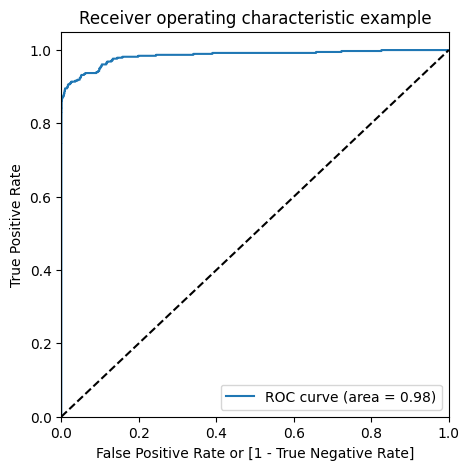

In [133]:
# Plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)

**Evaluating the model on test data**

In [134]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 65.25%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.51      0.65        90

    accuracy                           1.00     56746
   macro avg       0.95      0.76      0.83     56746
weighted avg       1.00      1.00      1.00     56746



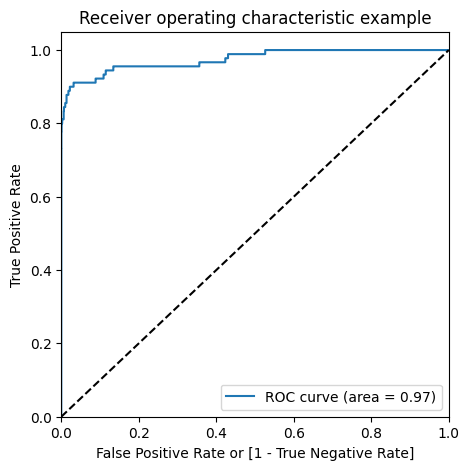

In [135]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]
# Plotting the ROC curve
draw_roc(y_test, y_test_pred_proba)